In [86]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from collections import Counter
from urlextract import URLExtract


In [74]:
f = open("fg.txt",'r',encoding='utf-8')

In [75]:
data = f.read()

In [115]:
# print(data)

In [78]:
# Regular expression pattern
pattern = r'(\d+/\d+/\d+, \d+:\d+\s*[ap]m) - ([^:]+): (.*)'

# Find matches in the chat data
matches = re.findall(pattern, data)

# Create lists to store extracted data
timestamps, senders, messages = [], [], []

# Iterate through matches and extract data
for match in matches:
    timestamps.append(match[0])
    senders.append(match[1])
    messages.append(match[2])

# Create a DataFrame from the lists
df = pd.DataFrame({"timestamp": timestamps, "sender": senders, "message": messages})

# Display the DataFrame
df.tail()

,timestamp,sender,message
39810,"17/01/2024, 10:44 am",Mujeeb khan,@917774952797
39811,"17/01/2024, 10:44 am",Sanu 2.🙂,Pata he usko ......vo he😂
39812,"17/01/2024, 10:50 am",Mujeeb khan,Kamse kam vo roz roz ye toh nhi bolta ye karna...
39813,"17/01/2024, 11:05 am",Harshad,<Media omitted>
39814,"17/01/2024, 11:40 am",Sanu 2.🙂,Right


In [79]:
# Create sender counts as a series
sender_count_series = df["sender"].value_counts()
sender_count_series

Wini 😂         9842
Mujeeb khan    9038
Sanu 2.🙂       8428
Pravin Kale    4572
Harshad        4114
Model          3821
Name: sender, dtype: int64

<Axes: >

c:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128514 (\N{FACE WITH TEARS OF JOY}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128514 (\N{FACE WITH TEARS OF JOY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


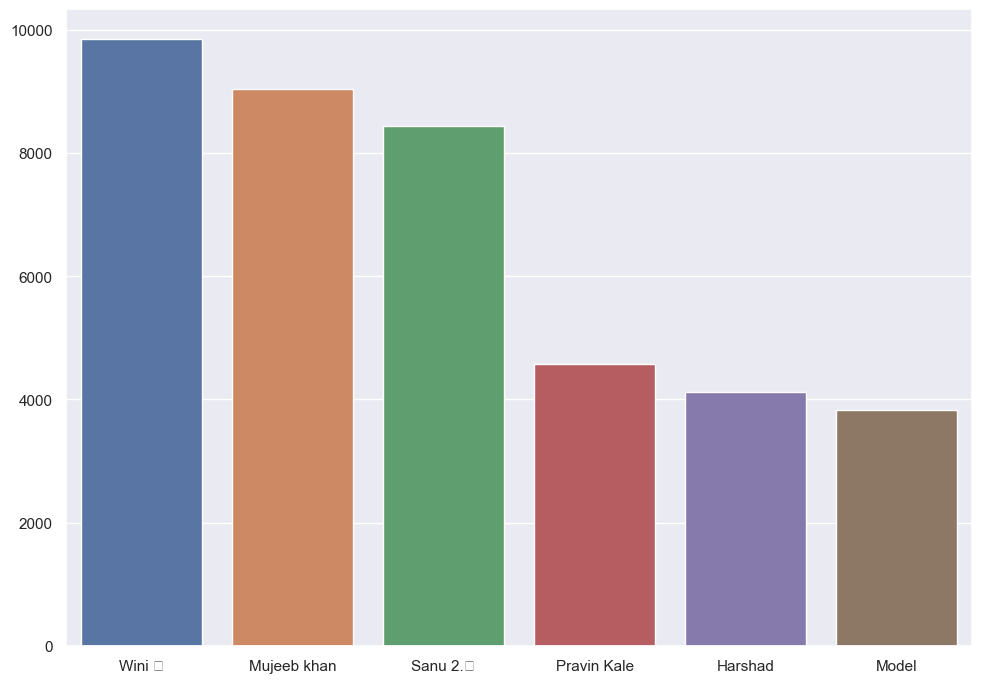

In [80]:
sns.barplot(x=sender_count_series.index, y=sender_count_series.values)

c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128514 (\N{FACE WITH TEARS OF JOY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


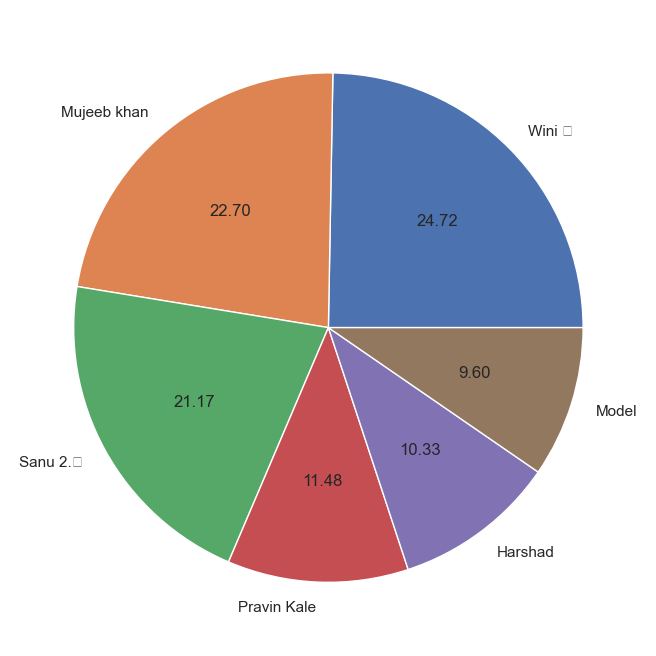

In [83]:
plt.pie(sender_count_series.values, labels= sender_count_series.index, autopct = "%0.2f")
plt.show()

In [112]:
emojis = []
users = ['Wini 😂', 'Mujeeb khan', 'Sanu 2.🙂', 'Pravin Kale', 'Harshad', 'Model']

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [113]:
a = pd.DataFrame(Counter(emojis).most_common(170)) 

In [109]:
a

,0,1
0,😂,10794
1,🙄,1919
2,🙂,1391
3,🔥,1165
4,🥲,1161
...,...,...
165,👊,4
166,🔵,4
167,🤐,4
168,💘,4


In [127]:
emojis_by_user = {}

for index, row in df.iterrows():
    sender = row['sender']
    message = row['message']

    emojis = [c for c in message if c in emoji.EMOJI_DATA]

    if sender not in emojis_by_user:
        emojis_by_user[sender] = emojis
    else:
        emojis_by_user[sender].extend(emojis)

user_to_analyze = 'Sanu 2.🙂'
user_emojis = emojis_by_user.get(user_to_analyze, [])

# Get the most common emojis used by the user
most_common_emojis = Counter(user_emojis).most_common(10)  # Change 10 to any desired number

# Display the result
print(f"Most common emojis used by {user_to_analyze}:")
most_common_emojis


Most common emojis used by Sanu 2.🙂:


[('😂', 2885),
 ('🙄', 1370),
 ('🙂', 1150),
 ('🥺', 627),
 ('🔥', 444),
 ('🥲', 402),
 ('😶', 301),
 ('🥳', 295),
 ('😑', 288),
 ('🤧', 236)]

In [88]:
extractor = URLExtract()

links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [91]:
links

['https://meet.google.com/ssw-whwz-fsz',
 'http://collegecirculars.unipune.ac.in/sites/examdocs/_layouts/mobile/view.aspx?List=44492847%2D1f0c%2D493f%2Da969%2D4fae0be95833&View=90abe200%2D2461%2D477a%2Da17d%2D326d2f63e7bb',
 'https://youtu.be/XhcrBakPW_o',
 'https://youtu.be/rYq_nK-o3hY',
 'https://drive.google.com/drive/folders/1D6CwoD2H1iVrmOY_kNlBxv2tuo6AY-xA',
 'https://youtube.com/shorts/uFx-vWIslRM?feature=share',
 'https://youtube.com/shorts/AapHsQRvq78?feature=share',
 'https://youtube.com/shorts/5b1gUMLMhWU?feature=share',
 'https://www.facebook.com/reel/686975705770358?fs=e&s=cl',
 'https://youtu.be/EM9pHRODfMo',
 'https://www.instagram.com/reel/CdphWdDIc_m/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/Cd2UpyOJtI9/?igshid=MDJmNzVkMjY=',
 'https://youtube.com/shorts/MhSfaj-EIXQ?feature=share',
 'https://drive.google.com/drive/folders/1bKaiDvt_TnPQQy1FdBHB8mO630gqpntT',
 'https://youtube.com/shorts/RzS00fTjnFQ?feature=share',
 'https://drive.google.com/drive/folders/1

[]

[]

In [14]:
# df

,user_message,message_date


In [32]:
# df['message_date']

In [13]:
#changing message date into date time format

df["message_date"] = pd.to_datetime(df['message_date'], format = "%d/%m/%y, %H:%M - ") 

In [33]:
# df['message_date']

In [15]:
df.shape

(62, 2)

In [34]:
# df

In [18]:
#spliting the user message and seperating the name and message 

df.rename(columns={'message_date':'date'}, inplace = True)

In [19]:
df

,user_message,date
0,"Akanksha ""Team""\n",2021-01-18 15:05:00
1,You were added\n,2021-01-19 15:05:00
2,Monika Hope you candidates are ready to atten...,2022-08-27 14:56:00
3,Shweta: <Media omitted>\n\n,2022-08-27 16:28:00
4,Aknasha: <Media omitted>\n,2022-08-27 17:46:00
...,...,...
57,Ashish : <Media omitted>\n\n,2022-08-30 15:42:00
58,Bhaviya: Syllabus \n\n,2022-08-30 16:33:00
59,Bhaviya: 👍🏻\n,2022-08-30 19:04:00
60,Ashish : 👌🏻\n,2022-08-30 19:04:00


In [36]:
# df

# Making more columns like year, months,days,hours,minutes

In [23]:
df['year'] = df['date'].dt.year 

In [24]:
df

,date,user,message,year
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021
1,2021-01-19 15:05:00,group notification,You were added\n,2021
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022
...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022


In [25]:
df['month'] = df['date'].dt.month_name()

In [26]:
df

,date,user,message,year,month
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August
...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August


In [27]:
df['day'] = df['date'].dt.day

In [28]:
df

,date,user,message,year,month,day
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,18
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,19
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,27
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,27
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,27
...,...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August,30
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August,30
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August,30
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August,30


In [29]:
df['hour'] = df['date'].dt.hour

In [30]:
df

,date,user,message,year,month,day,hour
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,18,15
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,19,15
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,27,14
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,27,16
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,27,17
...,...,...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August,30,15
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August,30,16
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August,30,19
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August,30,19


In [31]:
df['minute'] = df['date'].dt.minute

In [32]:
df

,date,user,message,year,month,day,hour,minute
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,18,15,5
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,19,15,5
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,27,14,56
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,27,16,28
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,27,17,46
...,...,...,...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August,30,15,42
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August,30,16,33
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August,30,19,4
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August,30,19,4


In [33]:
df.shape[0]

62

In [34]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,18,15,5
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,19,15,5
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,27,14,56
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,27,16,28
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,27,17,46


In [35]:
df[df['user'] == 'Bhaviya'].shape

(3, 8)

In [36]:
words = []
for message in df['message']:
    words.extend(message.split())

In [37]:
len(words)  #for calculating the length of the message

355

In [38]:
df[df['message']== '<Media Omitted>/n'].shape

(0, 8)

# Now Finding those words which repeatly more and more time

We have to find proper words from the message we don't want stopper type words 

In [82]:
temp = df[df['user'] != 'group notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [83]:
f = open('stop_hinglish.txt')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [85]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            print(word)

<media
omitted>
🫣🤭
https://forms.gle/dnbpdl5nmshmhf9k7
swati
register
form
thankyou
🔥
*founder's
opinion
|
student
upskilled
electric
vehicle
industry*
➖➖➖➖➖
🤔💭
industry
leader
➖➖➖➖➖
💢
*click
watch*
https://www.youtube.com/watch?v=23fq9-xuscu
➖➖➖➖➖
💢
*click
watch
interview
session*
https://www.youtube.com/watch?v=ibiccgpspem&t=574s
➖➖➖➖➖
💢
*28
august
2022*
free
workshop
query
doubts,
kindly
fill
form
👇🏻👇🏻
https://tinyurl.com/24vee9jt
😊
sukriya!!
<media
omitted>
hn
🔥
*free
live
workshop
design
development*
watch
live
streaming
youtube:-
https://youtu.be/zwlygyww7cw
free
workshop
*electric
vehicle
design
development*
query
doubts,
kindly
fill
form
information.
👇🏻👇🏻
https://forms.gle/ux6ywqkjmakhvthr6
details
kindly
join
*electric
vehicle*
alert
*whatsapp*
group
link
👇🏻
https://chat.whatsapp.com/d4vpunfyafu0ds2hp3vjuj
message
deleted
attendance
sheet
|
28th
august
2022
|
electric
vehicle
design
&
development
live
free
workshop
https://forms.gle/ux6ywqkjmakhvthr6
details
kindly
join
alert


In [87]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [89]:
from collections import Counter
Counter(words)  

#it shows that how many times the word comes in the chatting

Counter({'<media': 4,
         'omitted>': 4,
         '➖➖➖➖➖': 4,
         'workshop': 4,
         'kindly': 4,
         'fill': 4,
         'https://forms.gle/ux6ywqkjmakhvthr6': 4,
         'attending': 4,
         'form': 3,
         '|': 3,
         'vehicle': 3,
         '💢': 3,
         'free': 3,
         'live': 3,
         'design': 3,
         '🔥': 2,
         'electric': 2,
         'industry': 2,
         '*click': 2,
         'watch': 2,
         'august': 2,
         'query': 2,
         'doubts,': 2,
         '👇🏻👇🏻': 2,
         'development*': 2,
         '*electric': 2,
         'details': 2,
         'join': 2,
         'alert': 2,
         '*whatsapp*': 2,
         'group': 2,
         'link': 2,
         '👇🏻': 2,
         'https://chat.whatsapp.com/d4vpunfyafu0ds2hp3vjuj': 2,
         'message': 2,
         'deleted': 2,
         "today's": 2,
         '➖➖➖➖➖➖': 2,
         'upcoming': 2,
         'form👇🏻👇🏻': 2,
         'workshop.': 2,
         '👌🏻': 2,
         '

In [90]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(25))

,0,1
0,<media,4
1,omitted>,4
2,➖➖➖➖➖,4
3,workshop,4
4,kindly,4
5,fill,4
6,https://forms.gle/ux6ywqkjmakhvthr6,4
7,attending,4
8,form,3
9,|,3


In [117]:
df

,date,user,message,year,month,day,hour,minute
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,18,15,5
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,19,15,5
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,27,14,56
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,27,16,28
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,27,17,46
...,...,...,...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August,30,15,42
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August,30,16,33
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August,30,19,4
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August,30,19,4


# Finding the month name in which users are more active

In [119]:
df['month_num'] = df['date'].dt.month

In [120]:
df.groupby(['year','month_num','month']).count()['message']

year  month_num  month  
2021  1          January     2
2022  8          August     60
Name: message, dtype: int64

In [123]:
#to convert in into dataframe 

timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [124]:
timeline

,year,month_num,month,message
0,2021,1,January,2
1,2022,8,August,60


In [125]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + '-' + str(timeline['year'][i]))

In [126]:
timeline['time'] = time

In [127]:
timeline

,year,month_num,month,message,time
0,2021,1,January,2,January-2021
1,2022,8,August,60,August-2022


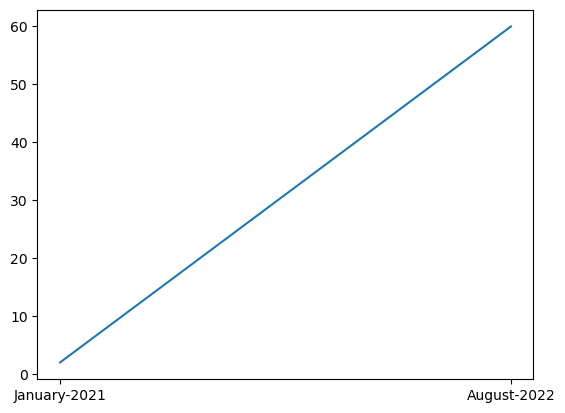

In [129]:
plt.plot(timeline['time'], timeline['message'])
plt.show()

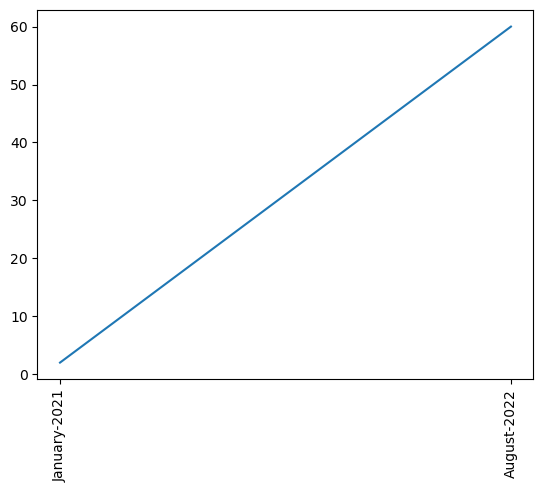

In [132]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

Now we are doing daily time analysis

In [134]:
df['only_date'] = df['date'].dt.date

In [135]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,18,15,5,1,2021-01-18
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,19,15,5,1,2021-01-19
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,27,14,56,8,2022-08-27
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,27,16,28,8,2022-08-27
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,27,17,46,8,2022-08-27
...,...,...,...,...,...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August,30,15,42,8,2022-08-30
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August,30,16,33,8,2022-08-30
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August,30,19,4,8,2022-08-30
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August,30,19,4,8,2022-08-30


In [139]:
daily = df.groupby('only_date').count()['message'].reset_index()

In [140]:
daily

,only_date,message
0,2021-01-18,1
1,2021-01-19,1
2,2022-08-27,10
3,2022-08-28,36
4,2022-08-30,14


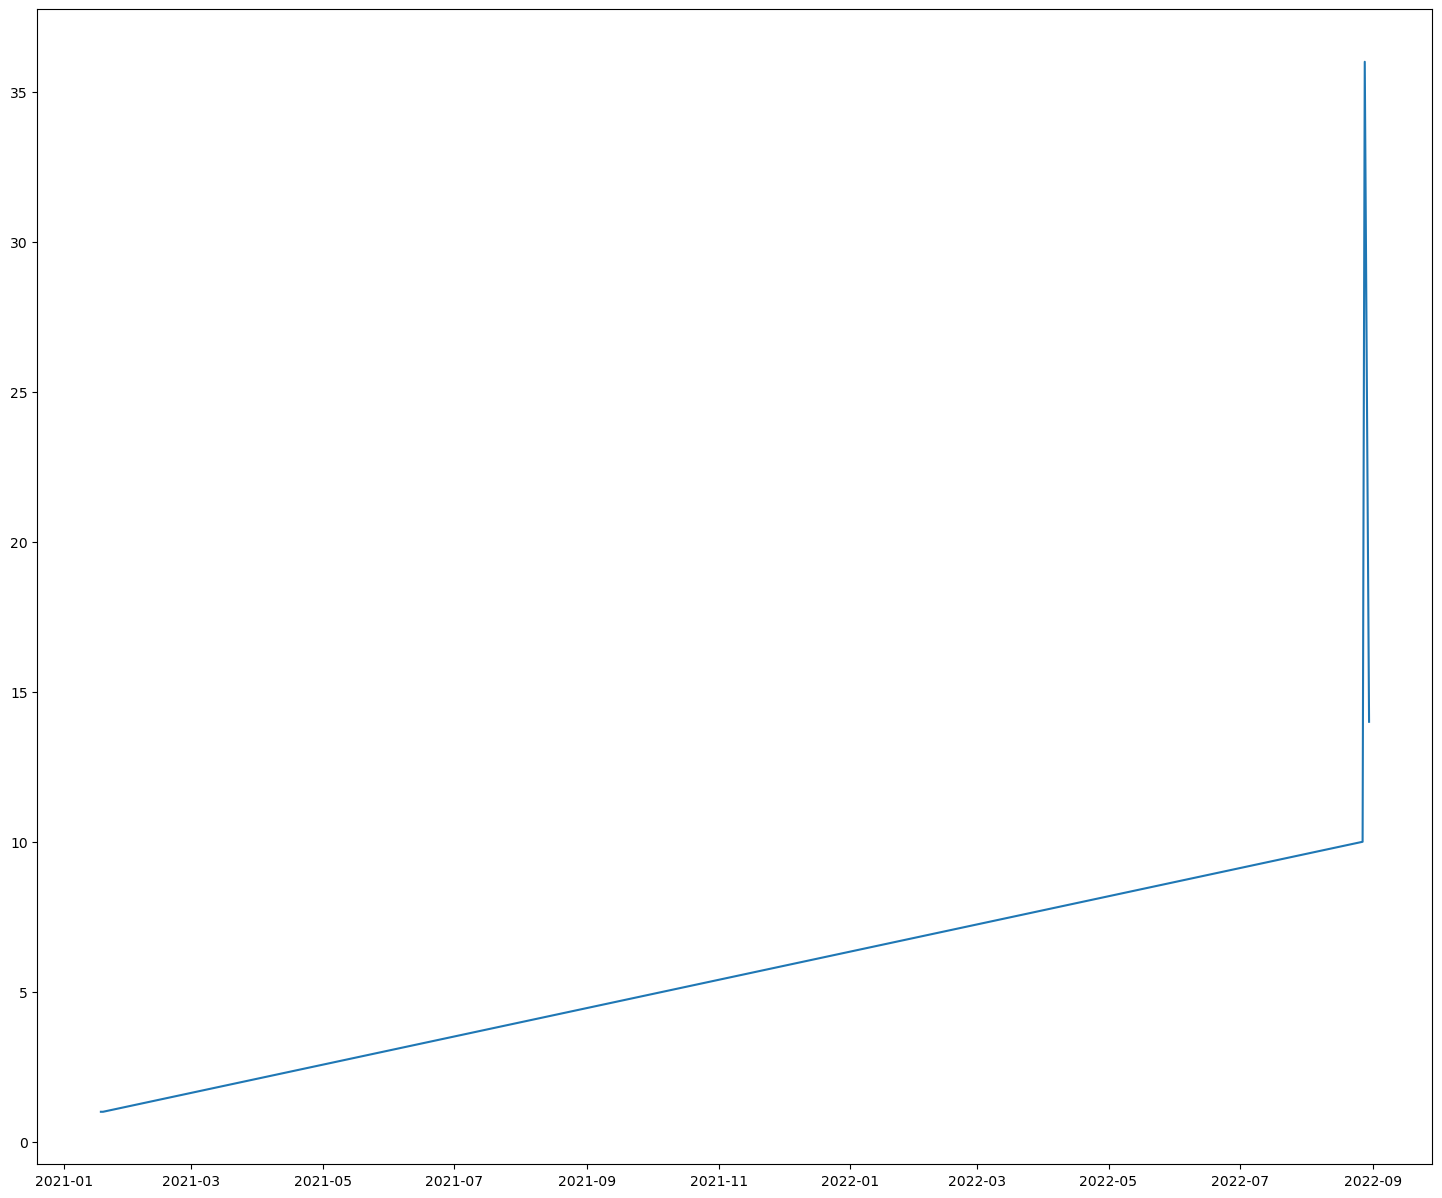

In [142]:
plt.figure(figsize = (18,15))
plt.plot(daily['only_date'],daily['message'])
plt.show()

For most busy day

In [144]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,18,15,5,1,2021-01-18
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,19,15,5,1,2021-01-19
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,27,14,56,8,2022-08-27
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,27,16,28,8,2022-08-27
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,27,17,46,8,2022-08-27


In [146]:
df['day_name'] = df['date'].dt.day_name()

In [147]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,18,15,5,1,2021-01-18,Monday
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,19,15,5,1,2021-01-19,Tuesday
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,27,14,56,8,2022-08-27,Saturday
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,27,16,28,8,2022-08-27,Saturday
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,27,17,46,8,2022-08-27,Saturday


In [148]:
df['day_name'].value_counts()

day_name
Sunday      36
Tuesday     15
Saturday    10
Monday       1
Name: count, dtype: int64

In [149]:
df['month'].value_counts()

month
August     60
January     2
Name: count, dtype: int64

In [151]:
periods = []
for hour in df[['day_name','hour']]['hour']:
    if hour ==23:
        periods.append(str(hour) + "-" +str("00"))
    elif hour ==0:
        periods.append(str("00") + "-" +str(hour+1))
    else:
        periods.append(str(hour) + "-" +str(hour+1))

In [154]:
df['period'] = periods

In [155]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,18,15,5,1,2021-01-18,Monday,15-16
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,19,15,5,1,2021-01-19,Tuesday,15-16
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,27,14,56,8,2022-08-27,Saturday,14-15
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,27,16,28,8,2022-08-27,Saturday,16-17
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,27,17,46,8,2022-08-27,Saturday,17-18
...,...,...,...,...,...,...,...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August,30,15,42,8,2022-08-30,Tuesday,15-16
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August,30,16,33,8,2022-08-30,Tuesday,16-17
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August,30,19,4,8,2022-08-30,Tuesday,19-20
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August,30,19,4,8,2022-08-30,Tuesday,19-20


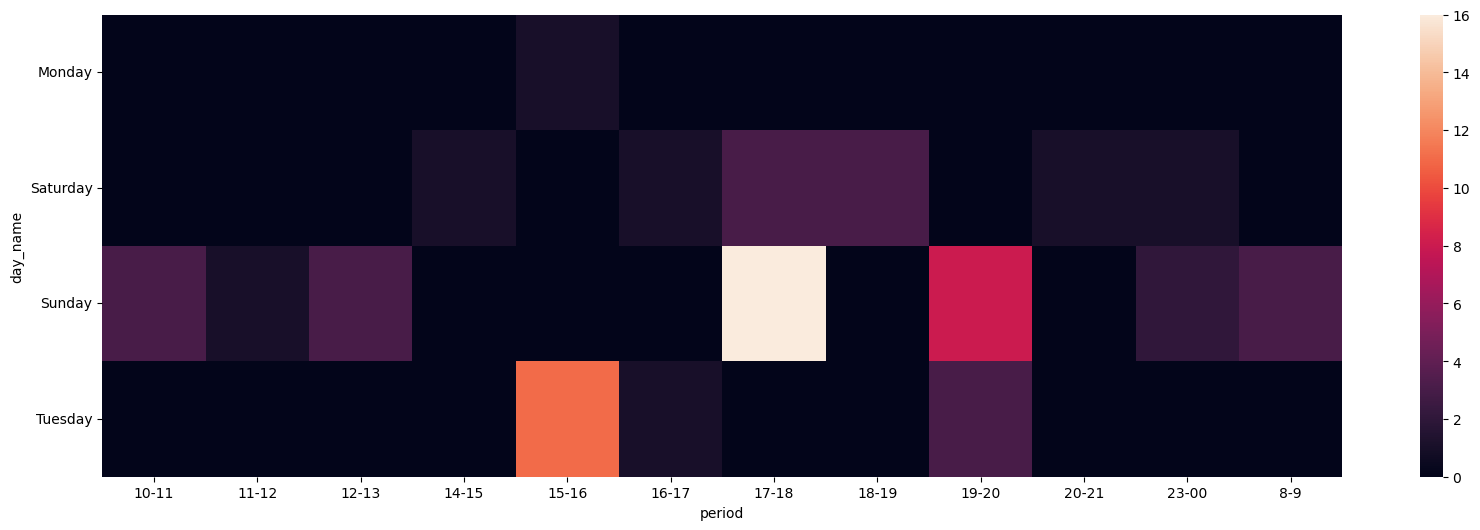

In [158]:
import seaborn as sns
plt.figure(figsize = (20,6))
sns.heatmap(df.pivot_table(index = 'day_name',columns = 'period',values='message' ,aggfunc = 'count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()